In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


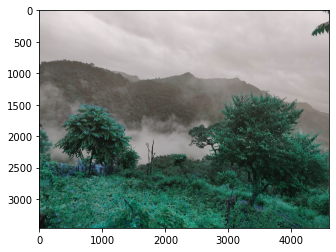

In [45]:
image = cv2.imread(r"C:\Users\pjmat\Downloads\sample_image.jpg")
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

In [46]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [47]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [48]:

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([84.04140863, 90.89867104, 92.12332206]),
 array([179.73630037, 180.31041839, 186.75693981]),
 array([78.96858733, 96.76492915, 38.57222383]),
 array([120.94660777, 125.51368042, 125.33767905]),
 array([30.53150744, 39.01427229, 21.32551669]),
 array([206.76034888, 206.45446035, 213.92752928]),
 array([110.02955971, 125.56144818,  56.66540396]),
 array([55.13901609, 68.06366678, 34.3483621 ])]

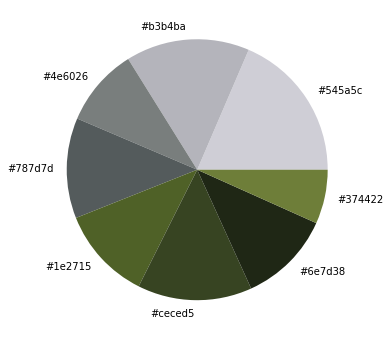

In [49]:
get_colors(get_image(r"C:\Users\pjmat\Downloads\sample_image.jpg"), 8, True)

In [51]:
IMAGE_DIRECTORY = "C:\\Users\\pjmat\\Downloads\\images\\"
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

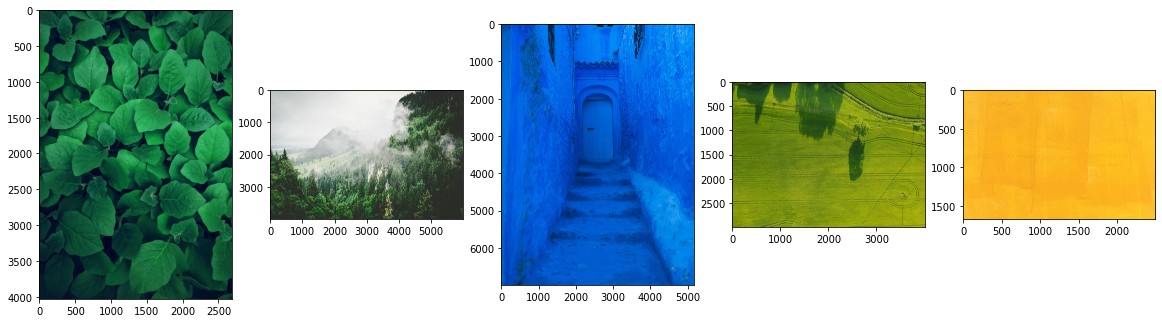

In [52]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [66]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [67]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

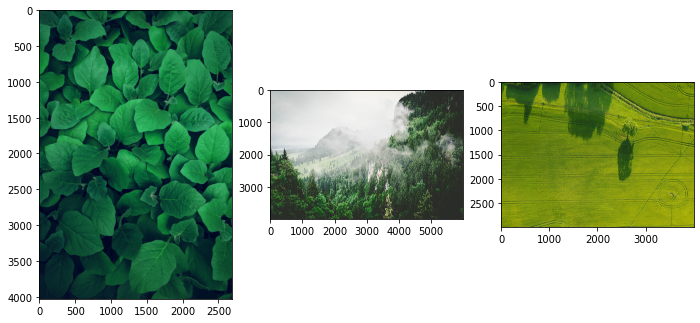

In [68]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)